In [17]:
# HCASE Experiments KNN in Reduced HCASE Space
#
# Author: Gergely Zahoranszky-Kohalmi, PhD
#
# Email: gergely.zahoranszky-kohalmi@nih.gov
#
# Organization: National Center for Advancing Translational Sciences (NCATS/NIH)
#


In [18]:
import pandas as pd

import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import seaborn as sns

import rdkit
from rdkit import Chem


from hcase import knn
from hcase.knn import get_mol, get_fingerprint, get_Tanimoto, compute_sim



In [19]:
# Configuration

fname_drug_emb_hcase_chembl = '../../data/red_drugs_emb_hcase_chembl.tab'







fname_rnd_5_drugs_and_knns = '../../data/rnd_5_app_drugs_drugbank_knn_5.tab'






fname_out_knn_drugs_emb_hcase_chembl = '../../plots/knn/si_red_knn_5_app_drugs_drugbank_chembl_24_1_bms_dim_2.png'

fname_out_knn_drugs_emb_hcase_chembl_coordinates = '../../data/si_red_knn_coords_app_drugs_drugbank_chembl_24_1_bms.tab'






#max_nn = 5
#fp_radius = 3
#fp_length = 2048


#num_rnd_selected_chemotypes = 5
#num_not_nn_rnd_molecules = 25

#random_seed = 55555
#random_seed_not_nn = 11111


In [20]:
# Import datasets



df_emb = pd.read_csv (fname_drug_emb_hcase_chembl, sep = '\t')

print (df_emb.shape[0])



df_knns = pd.read_csv (fname_rnd_5_drugs_and_knns, sep = '\t')

print (df_knns.shape[0])
print (df_knns.head)








10318
25
<bound method NDFrame.head of    knn_query_id knn_target_id   knn_sim  knn_rank  knn_color knn_fp_type  \
0       DB00006       DB04931  0.444444         1          1      Morgan   
1       DB00006       DB01284  0.405204         2          1      Morgan   
2       DB00006       DB00050  0.393162         3          1      Morgan   
3       DB00006       DB09067  0.382143         4          1      Morgan   
4       DB00006       DB06825  0.369748         5          1      Morgan   
5       DB00849       DB01174  0.489796         1          2      Morgan   
6       DB00849       DB00794  0.442308         2          2      Morgan   
7       DB00849       DB05246  0.321429         3          2      Morgan   
8       DB00849       DB01437  0.316667         4          2      Morgan   
9       DB00849       DB00252  0.277778         5          2      Morgan   
10      DB00977       DB01357  0.698630         1          3      Morgan   
11      DB00977       DB04575  0.629630         2

In [21]:
# Clean-up datasets

df_2 = df_emb[df_emb['hc_order'] == 2].copy()
df_3 = df_emb[df_emb['hc_order'] == 3].copy()
df_4 = df_emb[df_emb['hc_order'] == 4].copy()
df_5 = df_emb[df_emb['hc_order'] == 5].copy()
df_6 = df_emb[df_emb['hc_order'] == 6].copy()
df_7 = df_emb[df_emb['hc_order'] == 7].copy()
df_8 = df_emb[df_emb['hc_order'] == 8].copy()

# It's sufficient to work only with the embedding results of highest z = 8, as it includes all the Drug molecules
# Using all the ebeddings at other z values would lead to redundancy artifact and would invalidate the workflow
# logic.
df_valid = knn.filter_valid_mols (df_8, 'structure')


In [22]:
# Functions

data_labels_knn = {}

data_labels_knn['DB04931'] = 'A'
data_labels_knn['DB01284'] = 'B'
data_labels_knn['DB00050'] = 'C'
data_labels_knn['DB09067'] = 'D'
data_labels_knn['DB06825'] = 'E'
data_labels_knn['DB01174'] = 'F'
data_labels_knn['DB00794'] = 'G'
data_labels_knn['DB05246'] = 'H'
data_labels_knn['DB01437'] = 'I'
data_labels_knn['DB00252'] = 'J'
data_labels_knn['DB01357'] = 'K'
data_labels_knn['DB04575'] = 'L'
data_labels_knn['DB00655'] = 'M'
data_labels_knn['DB00783'] = 'N'
data_labels_knn['DB04573'] = 'O'
data_labels_knn['DB01249'] = 'P'
data_labels_knn['DB09135'] = 'Q'
data_labels_knn['DB09134'] = 'R'
data_labels_knn['DB09313'] = 'S'
data_labels_knn['DB01578'] = 'T'
data_labels_knn['DB11609'] = 'U'
data_labels_knn['DB00257'] = 'V'
data_labels_knn['DB00333'] = 'W'
data_labels_knn['DB01231'] = 'X'
data_labels_knn['DB08944'] = 'Y'


data_labels_rnd = {}

data_labels_rnd['DB11994'] = 'A'
data_labels_rnd['DB00593'] = 'B'
data_labels_rnd['DB00613'] = 'C'
data_labels_rnd['DB00172'] = 'D'
data_labels_rnd['DB00704'] = 'E'
data_labels_rnd['DB00204'] = 'F'
data_labels_rnd['DB01104'] = 'G'
data_labels_rnd['DB01114'] = 'H'
data_labels_rnd['DB00860'] = 'I'
data_labels_rnd['DB00770'] = 'J'
data_labels_rnd['DB08924'] = 'K'
data_labels_rnd['DB06282'] = 'L'
data_labels_rnd['DB06736'] = 'M'
data_labels_rnd['DB11184'] = 'N'
data_labels_rnd['DB00496'] = 'O'
data_labels_rnd['DB08877'] = 'P'
data_labels_rnd['DB00947'] = 'Q'
data_labels_rnd['DB08943'] = 'R'
data_labels_rnd['DB01599'] = 'S'
data_labels_rnd['DB02546'] = 'T'
data_labels_rnd['DB01138'] = 'U'
data_labels_rnd['DB00237'] = 'V'
data_labels_rnd['DB01325'] = 'W'
data_labels_rnd['DB01124'] = 'X'
data_labels_rnd['DB00177'] = 'Y'

colors = {}

colors['DB00006'] = 'green'
colors['DB00849'] = 'orange'
colors['DB00977'] = 'purple'
colors['DB01362'] = 'aqua'
colors['DB04837'] = 'blue'





def get_color (id, df_knn):
    # This only works if Test 1 and Test 2 below are OK.
    c = 0
    if id in list(df_knn['id']):
        x = df_knn[df_knn['id'] == id]
        c = list(x['knn_color'])[0]
    else:
        c = 0
   
    return (c)

 
def get_knn_type (id, df_knn):
    t = 'other'
    parents = df_knn[df_knn['knn_type'] == 'parent']
    parent_ids = list(parents['id'])
    nns = df_knn[df_knn['knn_type'] == 'nn']
    nn_ids = list(nns['id'])


    if id in parent_ids:
        t = 'parent'
    elif id in nn_ids:
        t = 'nn'
    else:
        t = 'other'
   
    return (t) 

    
def color_knns (df, df_knn):
    df['knn_color'] = df.apply (lambda x: get_color (x['id'], df_knn), axis = 1)
    df['knn_type'] = df.apply (lambda x: get_knn_type (x['id'], df_knn), axis = 1)



    return (df)


def check_rnd_knn (df):
    check = True
    #df = pd.read_csv ('../../../data/rnd_5_app_drugs_drugbank_knn_5.tab', sep = '\t')

    query_ids = {}
    target_ids = {}


    for id in list(df['knn_query_id']):
        query_ids[id] = True

    query_ids = list(query_ids.keys())

    if len(query_ids) != num_rnd_selected_chemotypes:
        check = False

    for id in query_ids:
        if id in list(df['knn_target_id']):
            check = False


    for id in list(df['knn_target_id']):
        if id not in list(target_ids.keys()):
            target_ids[id] = True
        else:
            check = False

    return (check)

"""
def save_mol_depiction (smiles, id, dataset_name, path):
    DrawingOptions.atomLabelFontSize = 55
    DrawingOptions.dotsPerAngstrom = 100
    DrawingOptions.bondLineWidth = 3.0
    mol = Chem.MolFromSmiles(smiles)
    fname = path + dataset_name + '_' + id + '.png'
    Chem.Draw.MolToFile(mol, fname, size=(1000, 1000))
"""

def get_letter (data_labels, id):
    return(data_labels[id])

def assign_data_labels (df, data_labels):
    df['data_label'] = df.apply(lambda x: get_letter(data_labels, x['knn_target_id']), axis = 1)
    
    return (df)
    

def separate_query_from_target_mols (df_knn):
    df_target = df_knn[['knn_target_id', 'knn_target_structure', 'knn_color', 'data_label']].copy()
    df_target['knn_type'] = 'nn'
    df_target = df_target.rename(columns = {
        'knn_target_id': 'id',
        'knn_target_structure': 'smiles'
    #    'knn_color': 'color'
    })

    df_query = df_knn[['knn_query_id', 'knn_query_structure', 'knn_color', 'data_label']].copy()
    df_query['knn_type'] = 'parent'
    df_query = df_query.rename(columns = {
        'knn_query_id': 'id',
        'knn_query_structure': 'smiles'
    #    'knn_color': 'color'
    })

    df_query = df_query.groupby(['id'], as_index = False).agg({
        'smiles': 'first',
         'knn_color': 'first',
         'knn_type': 'first',
         'data_label': 'first'
    })

    df_query = df_query.reset_index(drop = True)

    #df_knn = df_query.append(df_target, ignore_index = True)
    df_knn = pd.concat([df_query, df_target], ignore_index = True)

    return (df_knn)



    
def panel_plot_multi (subfig, df, df_knn, subfig_label):
    #df = df [df[df['hc_order'] == hc_order]
    df_other = df[df['knn_type'] == 'other']
    
    
    df_1 = df[df['knn_color'] == 1]
    df_1_parent = df_1[df_1['knn_type'] == 'parent']
    df_1_nn = df_1[df_1['knn_type'] == 'nn']

    #print (df.head)
    #print (df_knn.head)
    
    df_1_nn = df_1_nn.drop(columns = ['knn_color'])
    df_1_nn = df_1_nn.merge(df_knn, on = 'id', how = 'inner')
    
    #print (df_1_parent.head)
    #print (df_1_nn.head)


    df_2 = df[df['knn_color'] == 2]
    df_2_parent = df_2[df_2['knn_type'] == 'parent']
    df_2_nn = df_2[df_2['knn_type'] == 'nn']

    df_2_nn = df_2_nn.drop(columns = ['knn_color'])
    df_2_nn = df_2_nn.merge(df_knn, on = 'id', how = 'inner')



    df_3 = df[df['knn_color'] == 3]
    df_3_parent = df_3[df_3['knn_type'] == 'parent']
    df_3_nn = df_3[df_3['knn_type'] == 'nn']

    df_3_nn = df_3_nn.drop(columns = ['knn_color'])
    df_3_nn = df_3_nn.merge(df_knn, on = 'id', how = 'inner')


    df_4 = df[df['knn_color'] == 4]
    df_4_parent = df_4[df_4['knn_type'] == 'parent']
    df_4_nn = df_4[df_4['knn_type'] == 'nn']

    df_4_nn = df_4_nn.drop(columns = ['knn_color'])
    df_4_nn = df_4_nn.merge(df_knn, on = 'id', how = 'inner')


    df_5 = df[df['knn_color'] == 5]
    df_5_parent = df_5[df_5['knn_type'] == 'parent']
    df_5_nn = df_5[df_5['knn_type'] == 'nn']

    df_5_nn = df_5_nn.drop(columns = ['knn_color'])
    df_5_nn = df_5_nn.merge(df_knn, on = 'id', how = 'inner')


    
 


    subfig.scatter(df_other['Dim_1'].values, df_other['Dim_2'].values, c = 'gray', alpha = 0.3, marker = '.')

    subfig.scatter(df_1_parent['Dim_1'].values, df_1_parent['Dim_2'].values, c = 'blue', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_1_nn['Dim_1'].values, df_1_nn['Dim_2'].values, c = 'blue', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_1_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_1_nn['Dim_1'].values[i], df_1_nn['Dim_2'].values[i])))

    subfig.scatter(df_2_parent['Dim_1'].values, df_2_parent['Dim_2'].values, c = 'green', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_2_nn['Dim_1'].values, df_2_nn['Dim_2'].values, c = 'green', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_2_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_2_nn['Dim_1'].values[i], df_2_nn['Dim_2'].values[i])))



    subfig.scatter(df_3_parent['Dim_1'].values, df_3_parent['Dim_2'].values, c = 'purple', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_3_nn['Dim_1'].values, df_3_nn['Dim_2'].values, c = 'purple', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_3_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_3_nn['Dim_1'].values[i], df_3_nn['Dim_2'].values[i])))



    subfig.scatter(df_4_parent['Dim_1'].values, df_4_parent['Dim_2'].values, c = 'orangered', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_4_nn['Dim_1'].values, df_4_nn['Dim_2'].values, c = 'orangered', alpha = 0.7, marker = '+', s = 100)


    for i, txt in enumerate(list(df_4_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_4_nn['Dim_1'].values[i], df_4_nn['Dim_2'].values[i])))



    subfig.scatter(df_5_parent['Dim_1'].values, df_5_parent['Dim_2'].values, c = 'aqua', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_5_nn['Dim_1'].values, df_5_nn['Dim_2'].values, c = 'aqua', alpha = 0.7, marker = '+', s = 100)
    
    subfig.set_title (subfig_label, fontsize=24)
    subfig.set_xlabel ('Dim 1', fontsize=20)
    subfig.set_ylabel ('Dim 2', fontsize=20)
    
    for i, txt in enumerate(list(df_5_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_5_nn['Dim_1'].values[i], df_5_nn['Dim_2'].values[i])))


    # No need to return changes are in place, seems like a reference is passed
    #return (subfig)




def panel_plot_multi_rnd_nn (subfig, df, subfig_label):
    df_query = df[df['not_nn_color'] != 'gray']
    df_not_nn = df[df['not_nn_color'] == 'gray']



    subfig.scatter(df_query['Dim_1'].values, df_query['Dim_2'].values, c = df_query['not_nn_color'], alpha = 0.7, marker = 'x', s = 200)


    subfig.scatter(df_not_nn['Dim_1'].values, df_not_nn['Dim_2'].values, c = df_not_nn['not_nn_color'], alpha = 0.7, marker = '+', s = 100)

    
    
    subfig.set_title (subfig_label, fontsize=24)
    subfig.set_xlabel ('Dim 1', fontsize=20)
    subfig.set_ylabel ('Dim 2', fontsize=20)
    
    for i, txt in enumerate(list(df_not_nn['not_nn_label'])):
        subfig.annotate('  ' + txt, ((df_not_nn['Dim_1'].values[i], df_not_nn['Dim_2'].values[i])))


    # No need to return changes are in place, seems like a reference is passed
    #return (subfig)



def get_query_color (id, colors):
    return (colors[id])



def make_rnd_plots (subfigure, df, query_ids, not_nn_ids, data_labels, subfig_label):
    df_rnd = df[df['id'].isin(query_ids)].copy()
    df_not_nn = df[df['id'].isin(not_nn_ids)].copy()

    # df_rnd: randomly selected 5  query molecules (same that were randomly selected for KNN analysis)
    df_rnd['not_nn_color'] = df_rnd.apply (lambda x: get_query_color (x['id'], colors), axis = 1)

    # df_not_nn: randomly selected 25 molecules, that are not neightbors of the query molecules, at least no similarity information was used to select them.
    df_not_nn['not_nn_color'] = 'gray'

    df_not_nn = df_not_nn.reset_index (drop = True)
    df_not_nn['idx'] = df_not_nn.index
    df_rnd['idx'] = -1


    df_not_nn['not_nn_label'] = df_not_nn.apply(lambda x: get_letter(data_labels, x['id']), axis = 1)
    df_rnd['not_nn_label'] = ''

    df_not_nn_final = df_rnd.append(df_not_nn, ignore_index = True)

    #print (df_not_nn_final)

    panel_plot_multi_rnd_nn (subfigure, df_not_nn_final, subfig_label)




In [23]:
# Workflow for Reduced HCASE Space KNN analysis




df_knns = separate_query_from_target_mols (df_knns)

df_2_color = color_knns(df_2, df_knns)
df_3_color = color_knns(df_3, df_knns)
df_4_color = color_knns(df_4, df_knns)
df_5_color = color_knns(df_5, df_knns)
df_6_color = color_knns(df_6, df_knns)
df_7_color = color_knns(df_7, df_knns)
df_8_color = color_knns(df_8, df_knns)


#print (df_knns[['knn_query_id', 'knn_target_id', 'knn_sim', 'knn_color']])




df_2_color['phc_order'] = 2
df_3_color['phc_order'] = 3
df_4_color['phc_order'] = 4
df_5_color['phc_order'] = 5
df_6_color['phc_order'] = 6
df_7_color['phc_order'] = 7
df_8_color['phc_order'] = 8


# df_coords = df_2_color.append(df_3_color, ignore_index = True)
# df_coords = df_coords.append(df_4_color, ignore_index = True)
# df_coords = df_coords.append(df_5_color, ignore_index = True)
# df_coords = df_coords.append(df_6_color, ignore_index = True)
# df_coords = df_coords.append(df_7_color, ignore_index = True)
# df_coords = df_coords.append(df_8_color, ignore_index = True)
df_coords = pd.concat([df_2_color, df_3_color, df_4_color, df_5_color, df_6_color, df_7_color, df_8_color], ignore_index = True)

df_coords.to_csv (fname_out_knn_drugs_emb_hcase_chembl_coordinates, sep = '\t', index = False)








<Figure size 640x480 with 0 Axes>

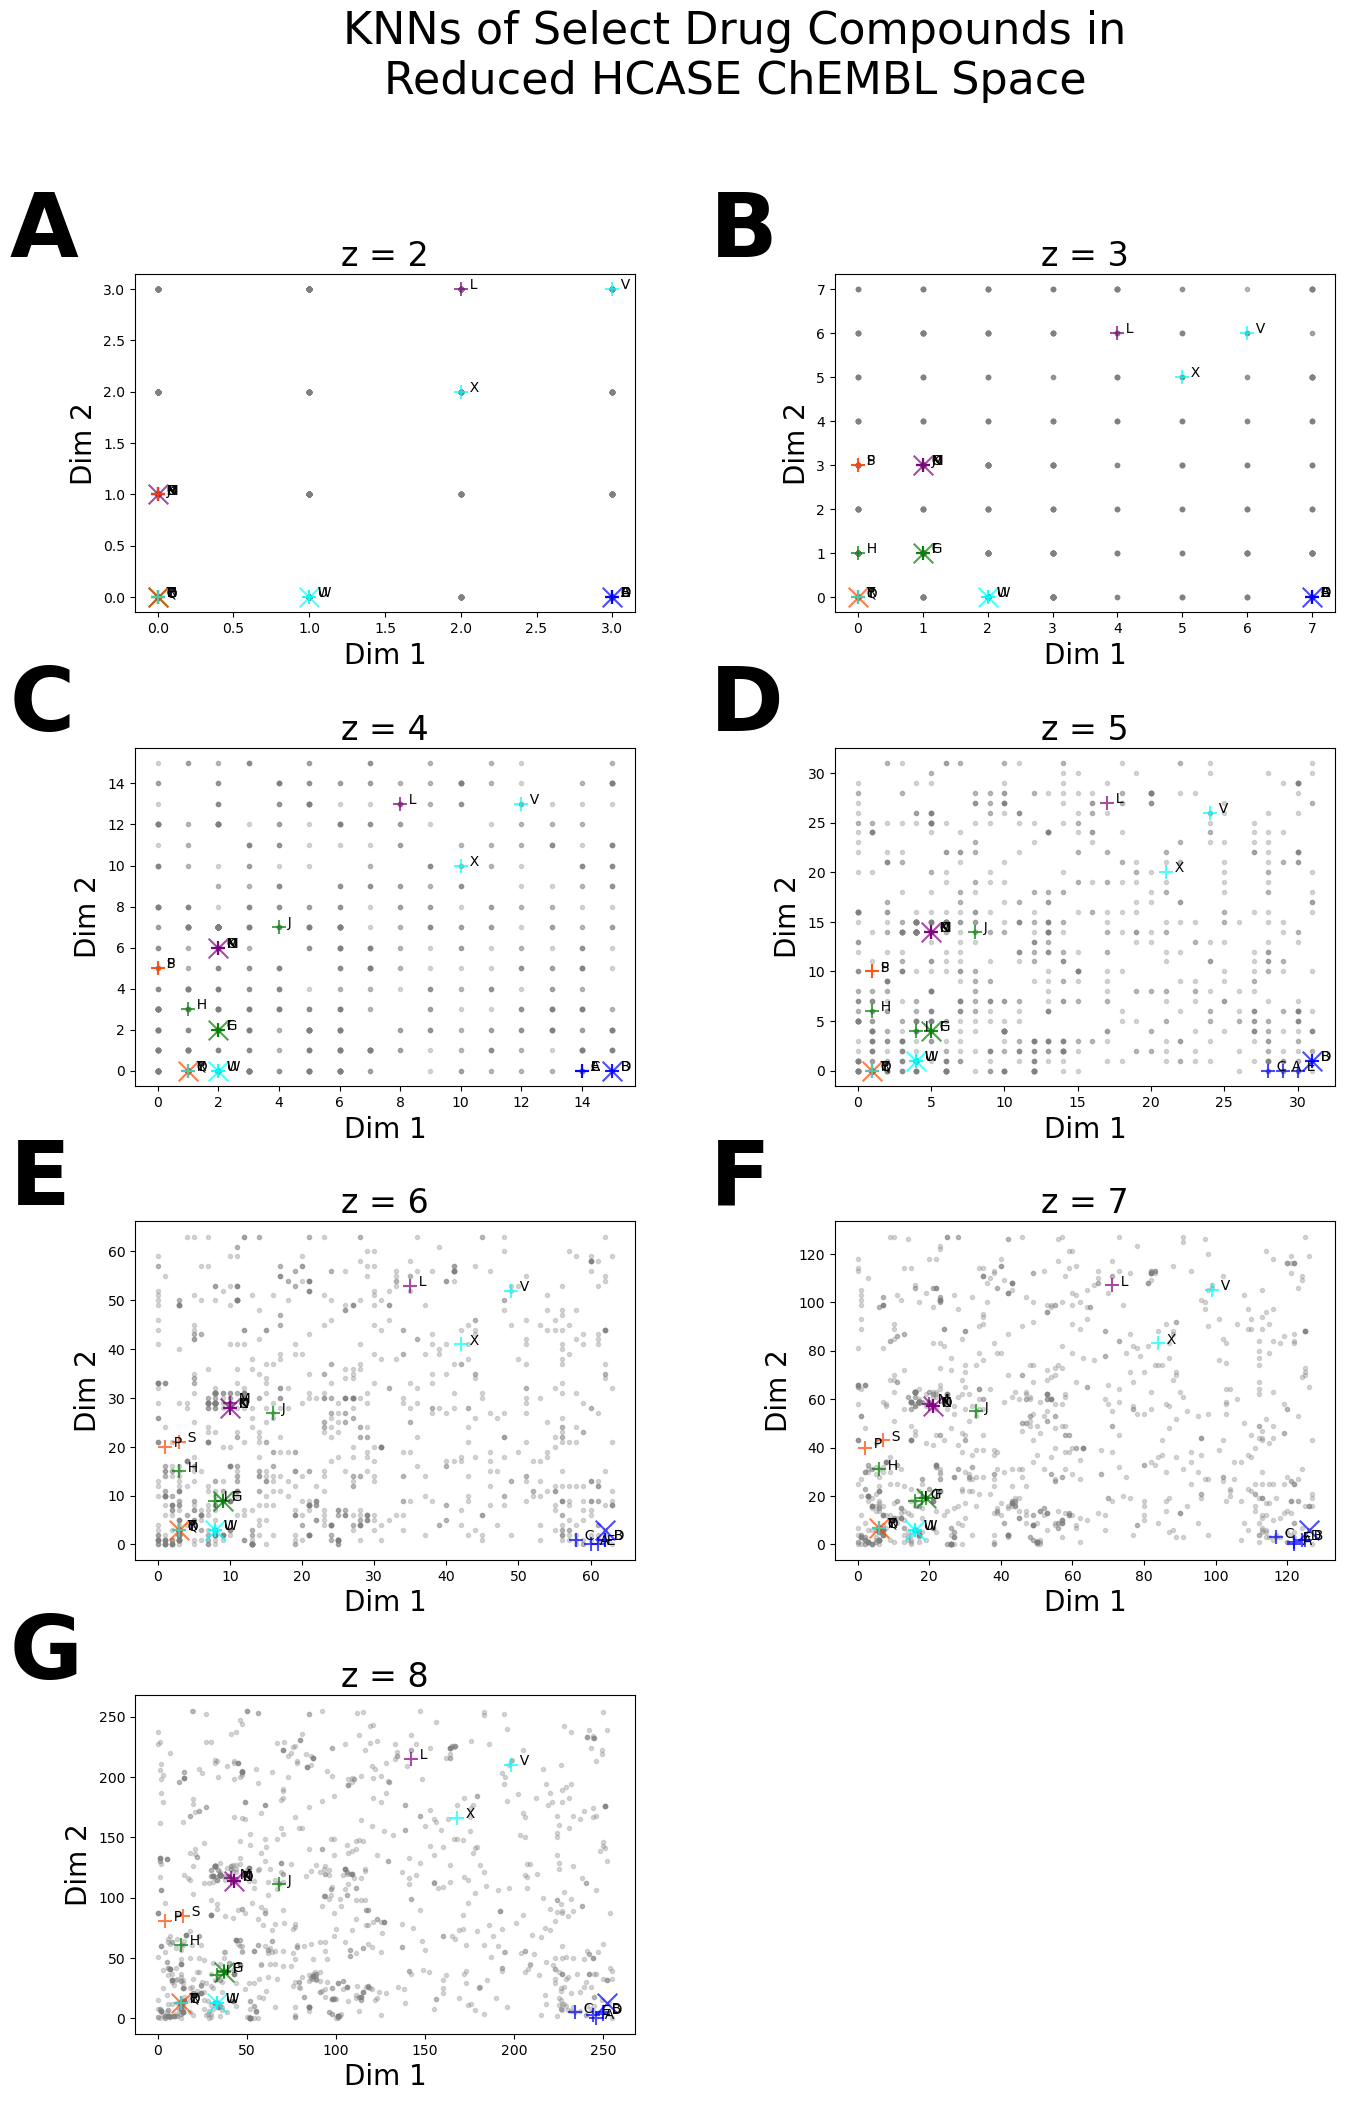

In [24]:
# Plotting KNN results

fig = plt.figure()

fig, subfigures = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 22))
#fig, subfigures = plt.subplots(nrows = 4, ncols = 2, sharex = True, sharey = True, figsize = (15, 22))



panel_plot_multi (subfigures[0][0], df_2_color, df_knns, subfig_label = 'z = 2')
panel_plot_multi (subfigures[0][1], df_3_color, df_knns, subfig_label = 'z = 3')
panel_plot_multi (subfigures[1][0], df_4_color, df_knns, subfig_label = 'z = 4')
panel_plot_multi (subfigures[1][1], df_5_color, df_knns, subfig_label = 'z = 5')
panel_plot_multi (subfigures[2][0], df_6_color, df_knns, subfig_label = 'z = 6')
panel_plot_multi (subfigures[2][1], df_7_color, df_knns, subfig_label = 'z = 7')
panel_plot_multi (subfigures[3][0], df_8_color, df_knns, subfig_label = 'z = 8')


subfigures[3][1].axis('off')


subfigures[0][0].text(-0.25, 1.25, "A", transform=subfigures[0][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[0][1].text(-0.25, 1.25, "B", transform=subfigures[0][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][0].text(-0.25, 1.25, "C", transform=subfigures[1][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][1].text(-0.25, 1.25, "D", transform=subfigures[1][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[2][0].text(-0.25, 1.25, "E", transform=subfigures[2][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[2][1].text(-0.25, 1.25, "F", transform=subfigures[2][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[3][0].text(-0.25, 1.25, "G", transform=subfigures[3][0].transAxes,
            fontsize=64, fontweight='bold', va='top')


fig.suptitle('KNNs of Select Drug Compounds in\nReduced HCASE ChEMBL Space', fontsize = 32, y = 1.02)
#fig.supylabel('Dim 2')


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.savefig (fname_out_knn_drugs_emb_hcase_chembl, dpi=300)

plt.show()




In [25]:
# References


# Ref: https://github.com/matplotlib/matplotlib/issues/3466/
# Ref: https://iwatobipen.wordpress.com/2017/11/03/draw-high-quality-molecular-image-in-rdkit-rdkit/
# Ref: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
# Ref: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html
# Ref: https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers
# Ref: https://matplotlib.org/3.1.1/gallery/shapes_and_collections/scatter.html
# Ref: https://matplotlib.org/3.1.1/tutorials/colors/colors.html
# Ref: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
# Ref: https://python-graph-gallery.com/106-seaborn-style-on-matplotlib-plot/
# Ref: https://python-graph-gallery.com/122-multiple-lines-chart/
# Ref: https://python-graph-gallery.com/125-small-multiples-for-line-chart/
# Ref: https://seaborn.pydata.org/examples/many_facets.html
# Ref: https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
# Ref: https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
# Ref: https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
# Ref: https://stackoverflow.com/questions/31686530/matplotlib-generate-a-new-graph-in-a-new-window-for-subsequent-program-runs/31686783
# Ref: https://stackoverflow.com/questions/39870642/matplotlib-how-to-plot-a-high-resolution-graph
# Ref: https://www.rdkit.org/docs/GettingStartedInPython.html
# Ref: https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html
# Ref: https://www.geeksforgeeks.org/how-to-create-multiple-subplots-in-matplotlib-in-python/
# Ref: https://stackoverflow.com/questions/44970881/matplotlib-multiple-scatter-subplots-with-shared-colour-bar
# Ref: https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots#:~:text=To%20change%20figure%20size%20of,10))%20when%20creating%20subplots.&text=For%20plotting%20subplots%20in%20a,numpy%20array%20(2%20dimensional).
# Ref: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html
# Ref: https://stackoverflow.com/questions/65901634/matplotlib-figure-supxlabel-does-not-work
# Ref: https://www.mathworks.com/help/matlab/ref/xlabel.html
# Ref: https://stackoverflow.com/questions/6963035/how-to-set-common-axes-labels-for-subplots
# Ref: https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size
# Ref: https://stackoverflow.com/questions/10035446/how-can-i-make-a-blank-subplot-in-matplotlib
# Ref: https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html



